In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import numpy as np
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate

import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

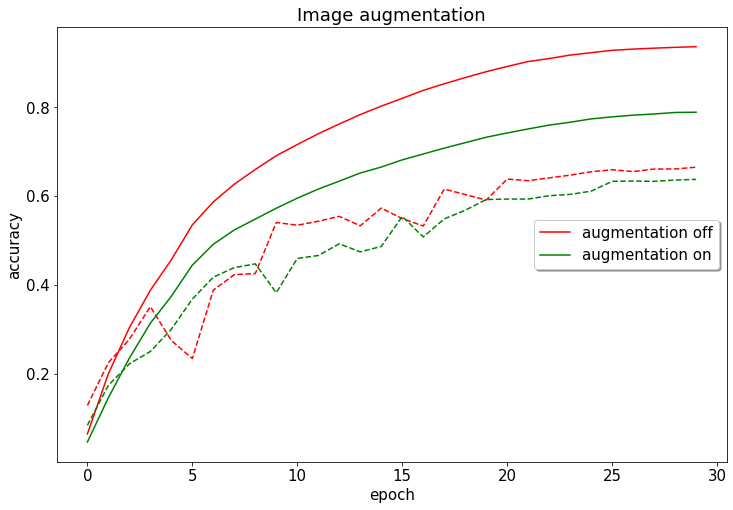

In [3]:
eval.plotting.accuracy_noloss(title="Image augmentation", index1='1008', label_1='augmentation off', index2='1010', label_2='augmentation on')

In [9]:
pd.read_csv("accuracy/1010.csv").iloc[-1]

loss       0.9992
acc        0.7889
val_acc    0.6376
Name: 29, dtype: float64

In [4]:
res1 = pd.read_csv('../runs/1008/results.csv')
res2 = pd.read_csv('../runs/1010/results.csv')

label1 = 'Aug off, SL 0.0'
label2 = 'Aug on, SL 0.0'

In [6]:
res2

,Unnamed: 0,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall
0,0,0.995,0.394962,12.897549,0.0,5.0,0.063517,0.050979
1,1,0.990,0.302277,9.388432,0.0,10.0,0.048994,0.072425
2,2,0.985,0.248750,7.705204,0.0,15.0,0.041178,0.086157
3,3,0.980,0.211109,6.399606,0.0,20.0,0.036570,0.099101
4,4,0.975,0.183903,5.495277,0.0,25.0,0.033526,0.110223
5,5,0.970,0.163159,4.901833,0.0,30.0,0.030884,0.121771
6,6,0.965,0.146987,4.421467,0.0,40.0,0.026750,0.141264
7,7,0.960,0.133892,4.037148,0.0,50.0,0.024007,0.154634


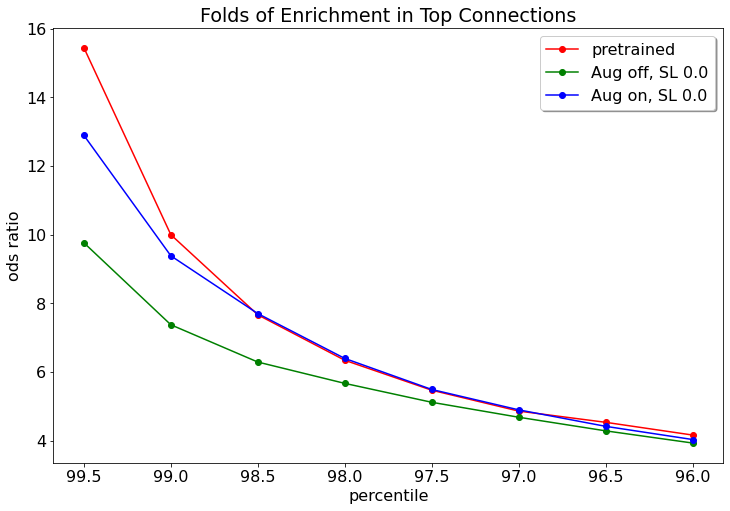

In [20]:
pretrained = pd.read_csv("pretrained_res.csv")
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*pretrained["enrichment_percentile"], pretrained["ods_ratio"], marker="o", color="red", label = 'pretrained')
plt.plot(100*res1["enrichment_percentile"], res1["ods_ratio"], marker="o", color="green", label = label1)
plt.plot(100*res2["enrichment_percentile"], res2["ods_ratio"], marker="o", color="b", label = label2)
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

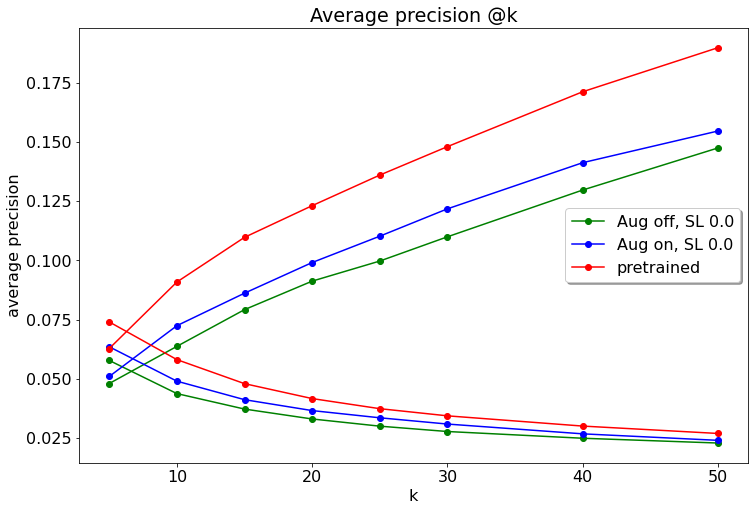

In [16]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res1["k"], res1["precision"], marker="o", color="green", label = label1)
plt.plot(res1["k"], res1["recall"], marker="o", color="g")
plt.plot(res2["k"], res2["precision"], marker="o", color="b", label = label2)
plt.plot(res2["k"], res2["recall"], marker="o", color="b")
plt.plot(pretrained["k"], pretrained["precision"], marker="o", color="r", label = 'pretrained')
plt.plot(pretrained["k"], pretrained["recall"], marker="o", color="red")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [11]:
#pd.concat([pd.read_csv("/Users/mbornhol/git/neural-profiling/00_thesis/plot_storage/pre_tr_eff_pre.csv"), pd.read_csv("/Users/mbornhol/git/neural-profiling/00_thesis/plot_storage/pre_tr_eff_enr.csv")], ignore_index=False, axis=1).to_csv('pretrained_res.csv')

In [30]:
# what about subsections
index1007 = pd.read_csv("/Users/mbornhol/git/neural-profiling/training/sc-metadata/compounds_1007.csv")["0"].tolist()

In [43]:
df = pd.read_csv('../runs/1008/1008_aggregated_median.csv')
e = eval.evaluation(df)
df = e.norm_agg()

df_in = df[df.Metadata_broad_sample.isin(index1007)]
df_out = df[~df.Metadata_broad_sample.isin(index1007)]

df_in_enr = e.eval(df_in , operation = 'enrichment')
df_out_enr = e.eval(df_out , operation = 'enrichment')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1280 features were identified


In [46]:
df = pd.read_csv('/Users/mbornhol/git/neural-profiling/00_thesis/pre_trained/aggregated_efficientnet_median.csv')
e = eval.evaluation(df)
df = e.norm_agg()

df_in = df[df.Metadata_broad_sample.isin(index1007)]
df_out = df[~df.Metadata_broad_sample.isin(index1007)]

pre_in = e.eval(df_in, operation = 'enrichment')
pre_out = e.eval(df_out, operation = 'enrichment')


/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


6400 features were identified


In [48]:
pre_in

,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,0.381521,13.128318,2.169827e-61
1,0.990,0.287066,8.570933,4.179235e-62
2,0.985,0.238619,6.587219,9.361290e-59
3,0.980,0.200834,5.366070,1.798724e-53
4,0.975,0.174824,4.923159,1.501224e-55
5,0.970,0.154105,4.462797,3.638656e-54
6,0.965,0.137835,4.090130,3.256968e-52
7,0.960,0.125442,3.768363,1.223670e-49


In [49]:
df_in_enr


,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,0.375150,8.759475,2.148259e-34
1,0.990,0.284691,6.572023,5.498687e-41
2,0.985,0.234173,5.912643,3.506236e-49
3,0.980,0.201225,5.536981,1.999430e-56
4,0.975,0.172950,4.853901,3.619079e-54
5,0.970,0.154648,4.346426,1.392964e-51
6,0.965,0.139073,4.140704,1.907348e-53
7,0.960,0.126319,3.679791,2.393376e-47


In [50]:
pre_out

,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,0.379426,16.317351,1.441320e-194
1,0.990,0.295184,10.468042,3.602797e-198
2,0.985,0.247046,8.083852,5.603827e-193
3,0.980,0.211885,6.680422,2.615208e-183
4,0.975,0.184474,5.798725,1.896192e-175
5,0.970,0.164272,5.223362,8.254121e-171
6,0.965,0.148209,4.754421,3.901679e-164
7,0.960,0.135100,4.387967,6.024311e-158


In [51]:
df_out_enr


,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,0.438945,9.475563,8.051156e-91
1,0.990,0.348594,7.174040,1.879778e-111
2,0.985,0.290573,6.161854,7.275273e-125
3,0.980,0.249480,5.516224,4.483365e-133
4,0.975,0.217103,4.976134,1.724045e-134
5,0.970,0.192867,4.725698,6.323051e-143
6,0.965,0.172978,4.388151,1.115687e-141
7,0.960,0.158155,4.083678,7.192898e-138
